In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import datetime
# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
# get the data
df = pd.read_csv('E:\Transit-Casa-Alex\Output\Modeling\Buffer10_Data.csv')
df.head()

,Unnamed: 0,AGENCY_ID,AREA_METERS,ARRIVAL_TIME_DEV,BIKERACK,BUFF_DIST,CAPACITY,COMP_STOPS,CROWDED,CROWDHOURS,...,TOTSPEED_S,TOTTIME,TOTTIME_S,TRIP_STOPS,VC,WAITHOURS,WGT_TRIP_S,WHEELCHAIR,geometry,w_geocode
0,0,SFMTA,599776,0.682316,0.000000,528.0,3260.250000,5,0.019438,6.227592,...,6.42,249.399464,274.720000,306,0.277641,111.265346,277.742329,0.000000,POLYGON ((-122.4762044957765 37.72256659330341...,6.075031e+13
1,1,SFMTA,699953,2.203463,0.581971,528.0,1092.000000,5,0.016778,2.320143,...,10.21,101.286325,85.300000,121,0.350798,28.368552,113.259977,0.000000,"POLYGON ((-122.478318121487 37.76653392304563,...",6.075030e+13
2,2,SFMTA,154591,1.281436,0.280910,528.0,2582.416667,6,0.000000,0.000000,...,6.18,79.707929,36.543333,134,0.095128,0.154942,136.417078,0.000000,POLYGON ((-122.4364941099191 37.72529018218376...,6.075026e+13
3,3,SFMTA,1058346,3.318491,1.000314,528.0,984.375000,3,0.000000,0.000000,...,9.25,51.444967,32.830000,91,0.020730,4.352127,78.575469,0.000000,POLYGON ((-122.4269088640789 37.72056829546914...,6.075026e+13
4,4,SFMTA,169458,2.728924,0.000000,528.0,882.000000,1,0.015137,1.717830,...,5.89,58.500186,43.610000,63,0.319402,1.118099,63.000000,0.739003,POLYGON ((-122.3971498149807 37.78990370709575...,6.075062e+13


In [3]:
#average ons and offs
df['AVG_RIDE'] = (df['ON'] + df['OFF'])/2

#drop itself out of a stops competing stops
df['COMP_STOPS'] = df['COMP_STOPS'] - 1

In [4]:
max(df['COMP_STOPS'])

14

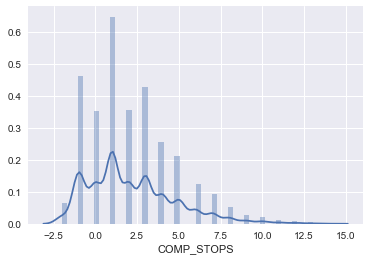

In [5]:
sns.distplot(df['COMP_STOPS'])

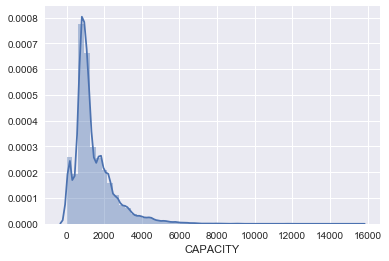

In [6]:
sns.distplot(df['CAPACITY'])

In [7]:
df.columns

Index(['Unnamed: 0', 'AGENCY_ID', 'AREA_METERS', 'ARRIVAL_TIME_DEV',
       'BIKERACK', 'BUFF_DIST', 'CAPACITY', 'COMP_STOPS', 'CROWDED',
       'CROWDHOURS', 'DEPARTURE_TIME_DEV', 'DOORCYCLES', 'DOW', 'DWELL',
       'EDHEALTH', 'EDHEALTH_DEN', 'EMPLOY_DEN', 'EOL', 'FARE', 'FID_1',
       'FULLFARE_REV', 'GEOID10', 'HEADWAY_S', 'HOUSING10', 'HOUSING10_DEN',
       'LEISURE', 'LEISURE_DEN', 'LOAD_ARR', 'LOAD_DEP', 'MONTH', 'NUMDAYS',
       'OBSDAYS', 'OBS_TRIP_S', 'OFF', 'ON', 'ONTIME5', 'OTHER', 'OTHER_DEN',
       'PASSDELAY_ARR', 'PASSDELA_DEP', 'PASSHOURS', 'PASSMILES', 'POP10',
       'POP10_DEN', 'RDBRDNGS', 'RETAIL', 'RETAIL_DEN', 'RUNSPEED',
       'RUNSPEED_S', 'RUNTIME', 'RUNTIME_S', 'SERVMILES', 'SERVMILES_S', 'SOL',
       'STOPNAME', 'STOP_ID', 'STOP_LAT_y', 'STOP_LON_y', 'TARGET_FID',
       'TARGET_F_1', 'TIMEPOINT', 'TOTAL_EMP', 'TOTSPEED', 'TOTSPEED_S',
       'TOTTIME', 'TOTTIME_S', 'TRIP_STOPS', 'VC', 'WAITHOURS', 'WGT_TRIP_S',
       'WHEELCHAIR', 'geometry', 'w_ge

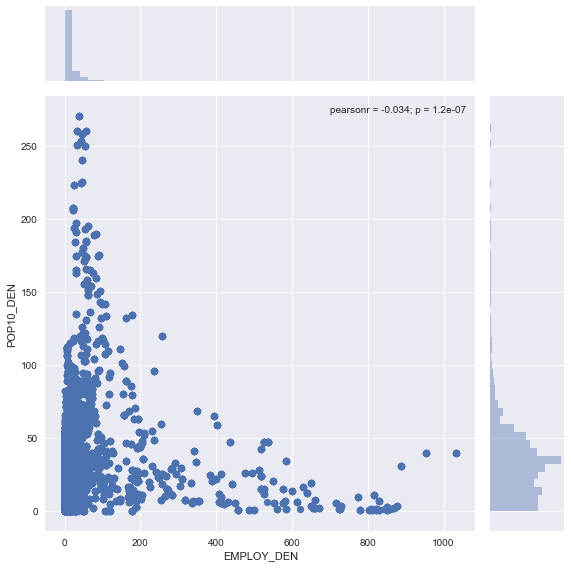

In [8]:
sns.jointplot(x="EMPLOY_DEN", y="POP10_DEN", data=df, size=8)

In [9]:
sns.pairplot?

In [20]:
df['MONTH'] = pd.to_datetime(df['MONTH'])

In [34]:
df['Month'] = df['MONTH'].apply(lambda row: row.month)

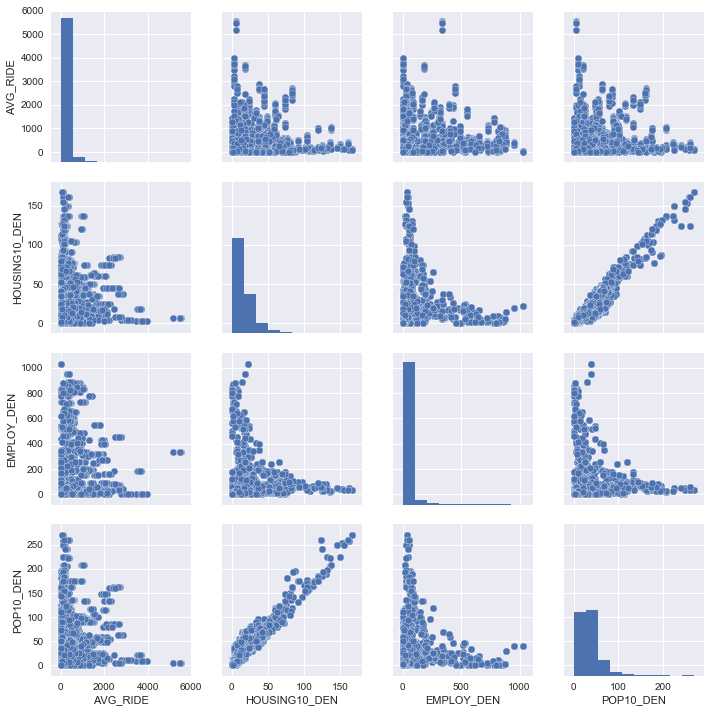

In [49]:
fig = sns.pairplot(df[[ 'AVG_RIDE','HOUSING10_DEN','EMPLOY_DEN','POP10_DEN']])
fig.savefig('E:\Transit-Casa-Alex\Output\Seaborn Pictures (Data Exploration)/Census_Block_Data.jpg')

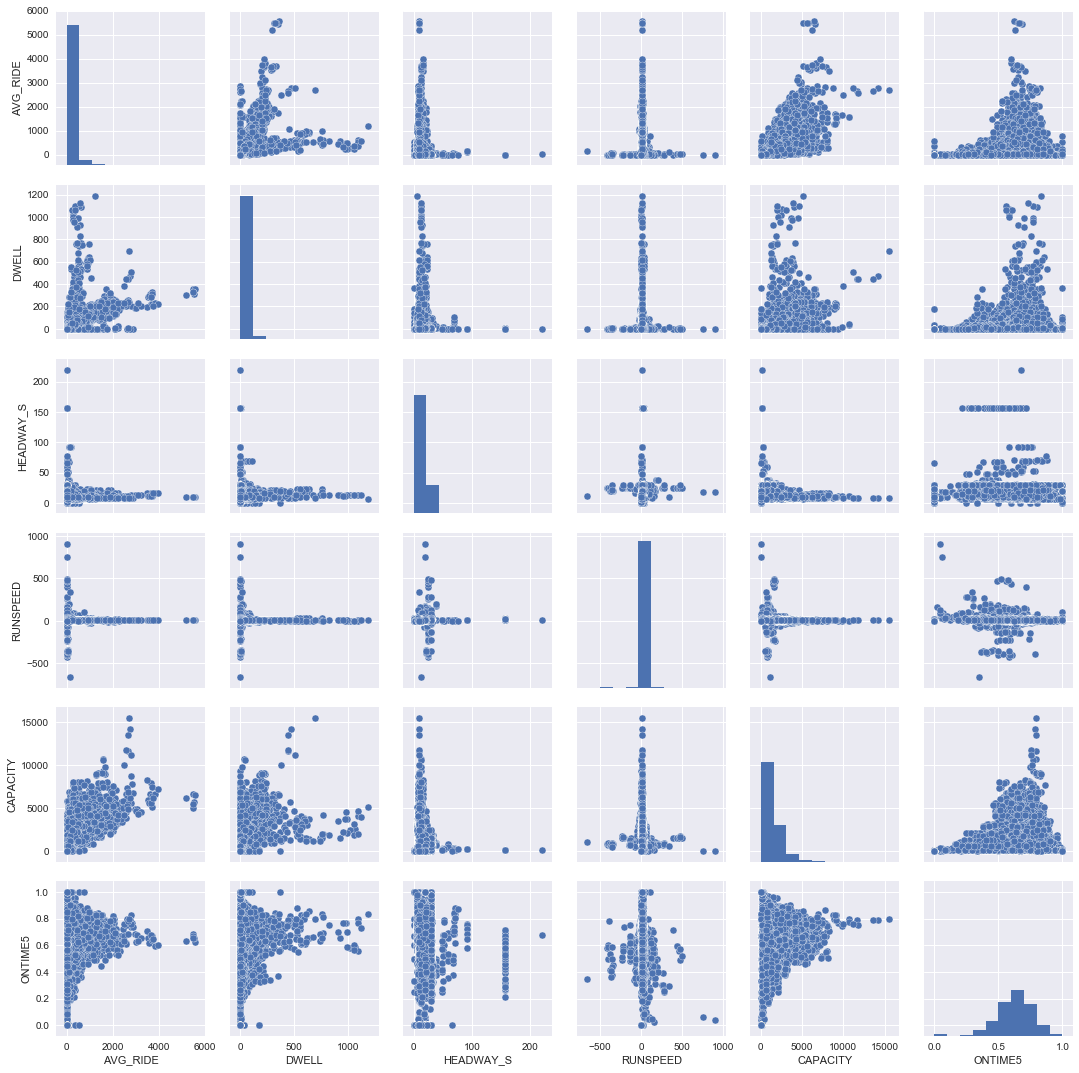

In [51]:
fig = sns.pairplot(df[['AVG_RIDE','DWELL','HEADWAY_S','RUNSPEED', 'CAPACITY', 'ONTIME5']])
fig.savefig('E:\Transit-Casa-Alex\Output\Seaborn Pictures (Data Exploration)/Bus Performance.jpg')

In [4]:
fig = sns.pointplot?